In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

In [3]:
df = pd.read_csv('globalterrorism.csv',low_memory=False)

In [4]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [5]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

## Selecting only desired columns

In [6]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


## Lets shorten our data frame

In [7]:
df.rename(columns={'iyear':'year', 'imonth':'month', 'iday':'day', 'country_txt':'country', 'region_txt':'region', 'provstate':'state',
       'city':'city', 'latitude':'lat', 'longitude':'long', 'location':'location', 'summary':'summary',
       'attacktype1_txt':'attack type', 'targtype1_txt':'target type', 'gname':'group', 'motive':'motive', 'weaptype1_txt':'weapon used',
       'nkill':'kill', 'nwound':'wound', 'addnotes':'add notes'},inplace=True)

In [8]:
df.head()

,year,month,day,country,region,state,city,lat,long,location,summary,attack type,target type,group,motive,weapon used,kill,wound,add notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [9]:
#seeing no of null values in all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country      181691 non-null  object 
 4   region       181691 non-null  object 
 5   state        181270 non-null  object 
 6   city         181257 non-null  object 
 7   lat          177135 non-null  float64
 8   long         177134 non-null  float64
 9   location     55495 non-null   object 
 10  summary      115562 non-null  object 
 11  attack type  181691 non-null  object 
 12  target type  181691 non-null  object 
 13  group        181691 non-null  object 
 14  motive       50561 non-null   object 
 15  weapon used  181691 non-null  object 
 16  kill         171378 non-null  float64
 17  wound        165380 non-null  float64
 18  add notes    28289 non-n

## filling all the columns with nan values with zero

In [10]:
for col in df.columns:
    df[col] = df[col].fillna(0)

In [11]:
df.isnull().sum()

year           0
month          0
day            0
country        0
region         0
state          0
city           0
lat            0
long           0
location       0
summary        0
attack type    0
target type    0
group          0
motive         0
weapon used    0
kill           0
wound          0
add notes      0
dtype: int64

In [12]:
attack_df = df['year'].value_counts().sort_index().to_frame().reset_index()
attack_df = attack_df.rename(columns={'year':'attacks','index':'year'})
attack_df

,year,attacks
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581
5,1975,740
6,1976,923
7,1977,1319
8,1978,1526
9,1979,2662


<AxesSubplot:xlabel='year', ylabel='attacks'>

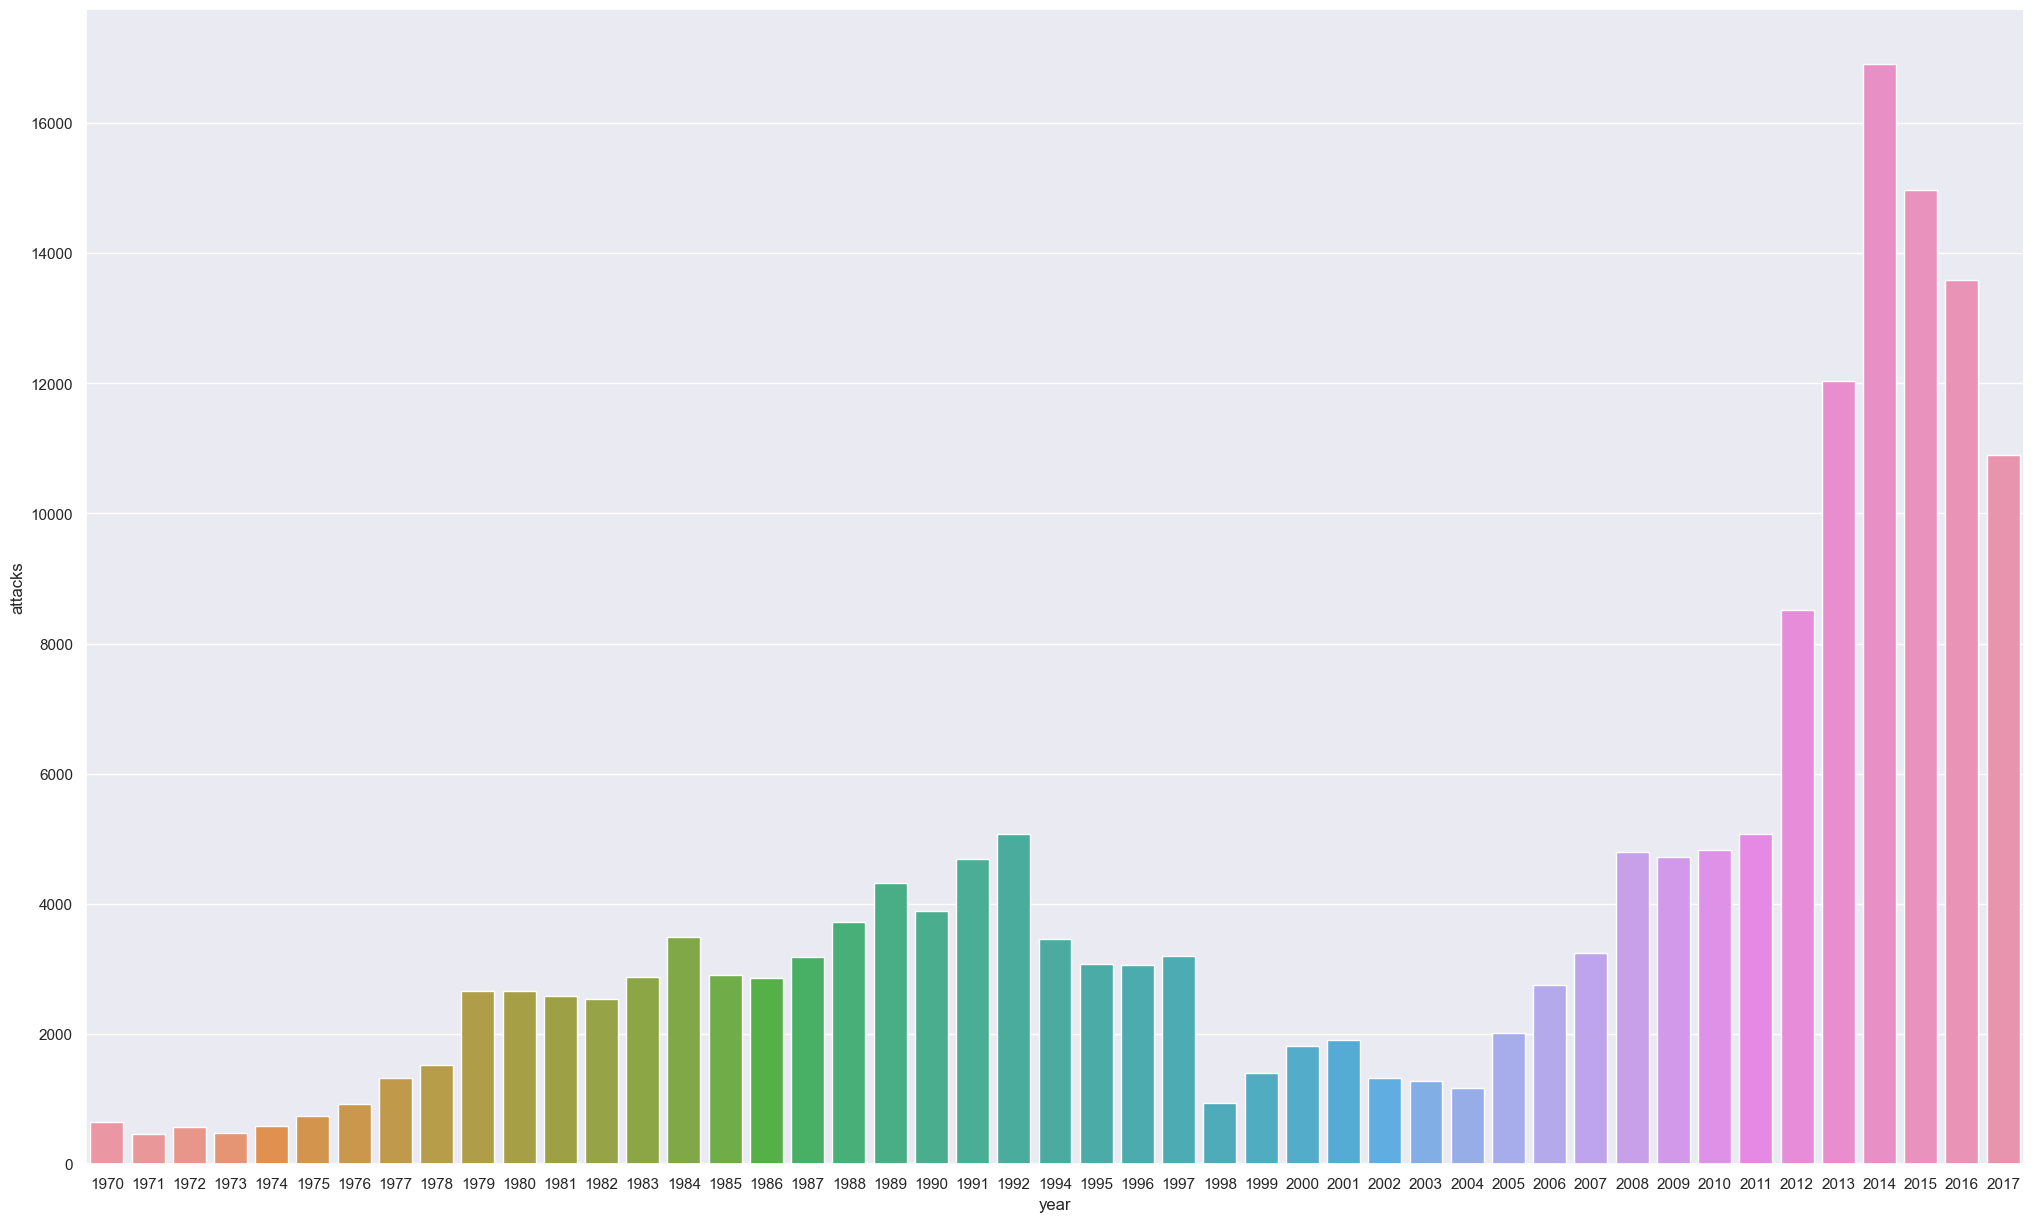

In [13]:
plt.figure(figsize=(25,15))
sns.barplot(x = 'year', y='attacks',data=attack_df)

In [14]:
df_group = df[['country','state','city','kill','group']]
df_group.head()

,country,state,city,kill,group
0,Dominican Republic,0,Santo Domingo,1.0,MANO-D
1,Mexico,Federal,Mexico city,0.0,23rd of September Communist League
2,Philippines,Tarlac,Unknown,1.0,Unknown
3,Greece,Attica,Athens,0.0,Unknown
4,Japan,Fukouka,Fukouka,0.0,Unknown


In [15]:
top15_country = df_group.groupby('country').sum().sort_values('kill',ascending=False).head(15)
top15_country

,kill
country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


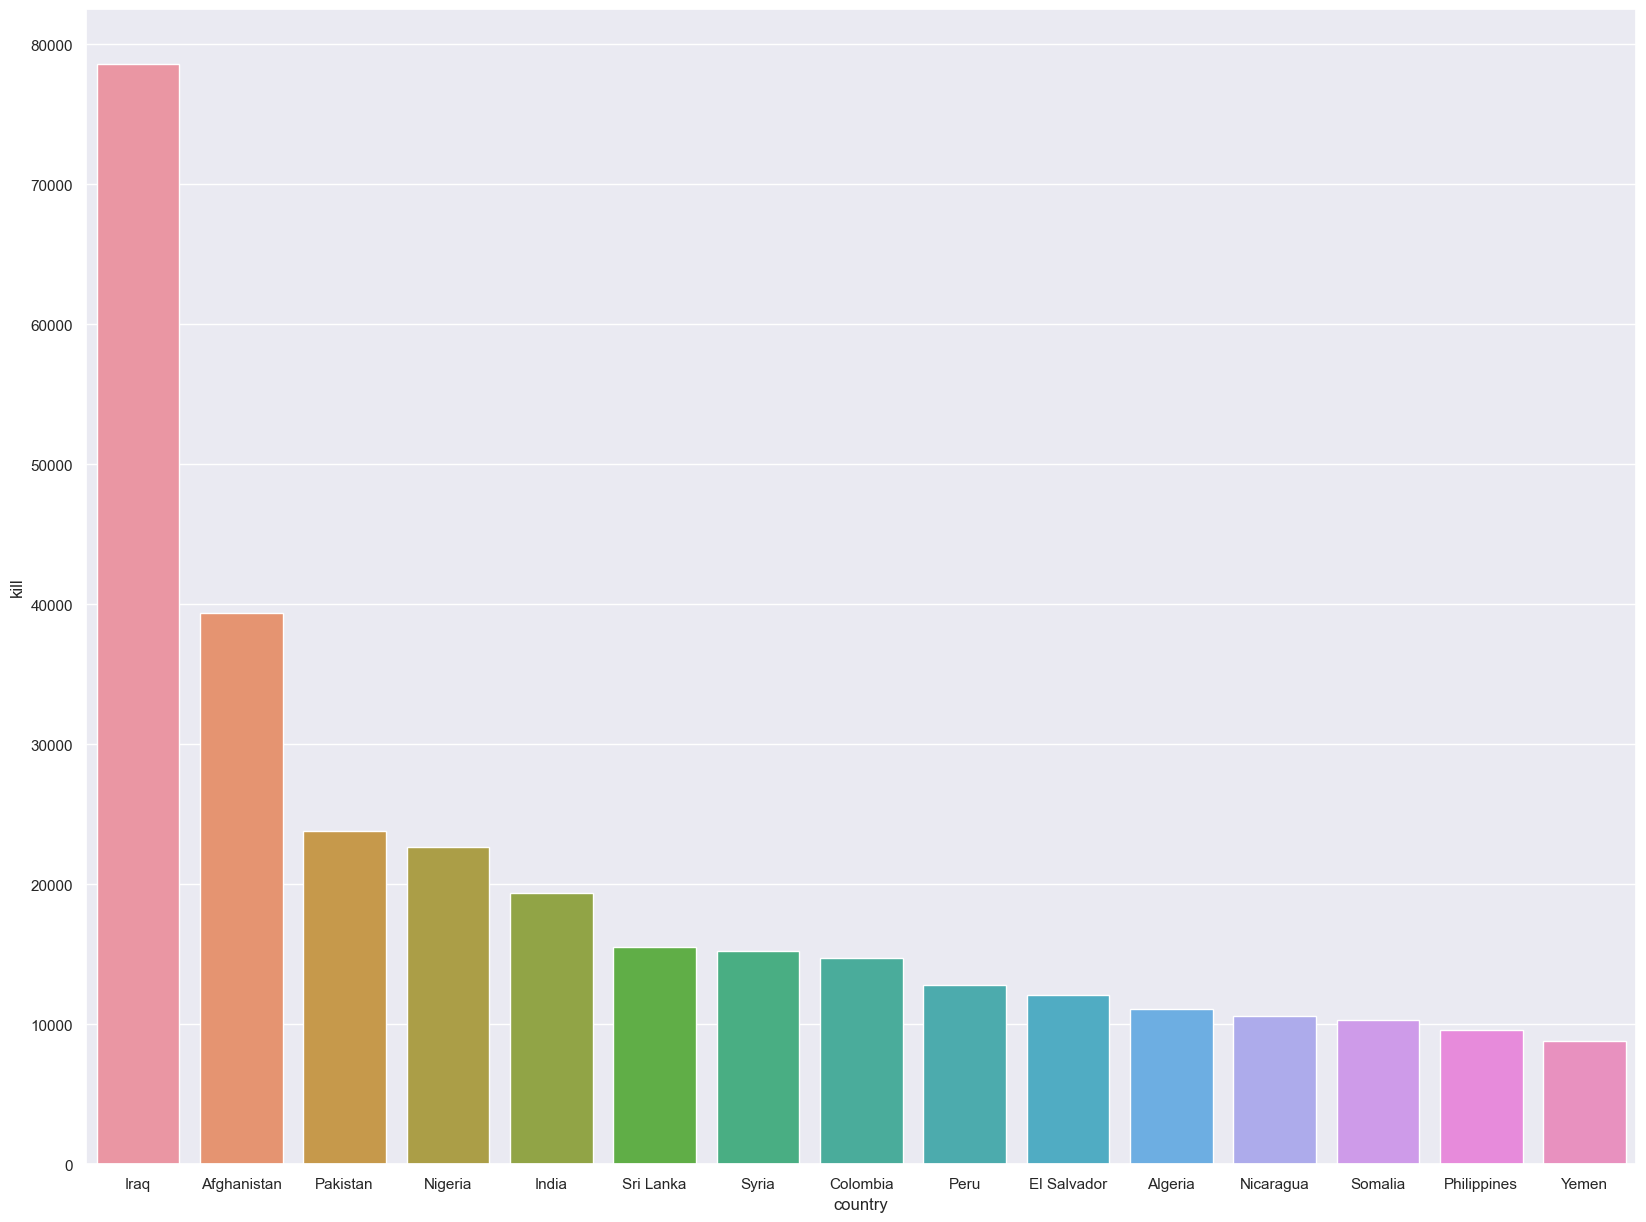

In [16]:
top15_country.reset_index(inplace=True)
plt.figure(figsize=(20, 15))
plot = sns.barplot(x='country', y='kill', data=top15_country)

In [17]:
top15_state = df_group.groupby('state').sum().sort_values('kill',ascending=False).head(15)
top15_state

,kill
state,
Baghdad,21215.0
Unknown,15476.0
Nineveh,15185.0
Borno,12063.0
Al Anbar,12009.0
Saladin,10673.0
Diyala,7779.0
Eastern,6323.0
Northern,5955.0


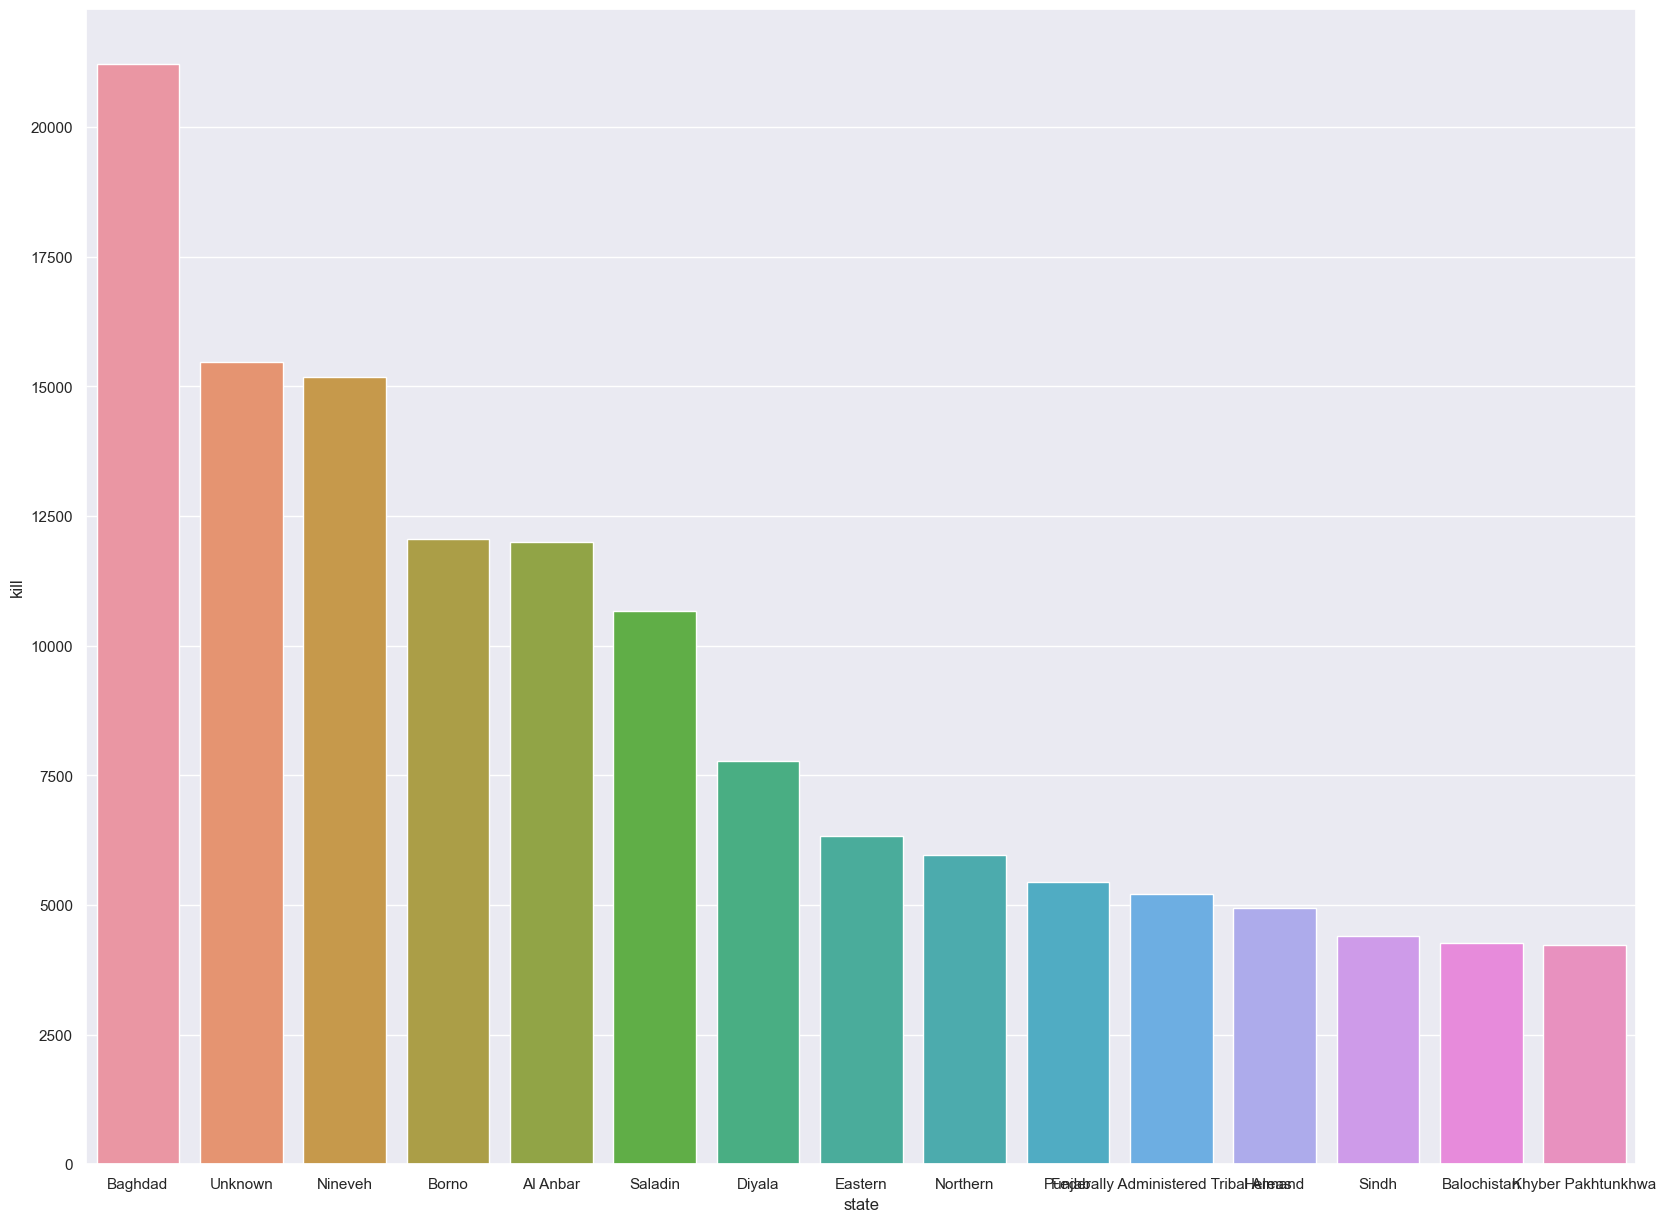

In [18]:
top15_state.reset_index(inplace=True)
plt.figure(figsize=(20, 15))
plot = sns.barplot(x='state', y='kill', data=top15_state)

In [19]:
top15_group = df_group.groupby('group').sum().sort_values('kill',ascending=False).head(15)
top15_group

,kill
group,
Unknown,112367.0
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0


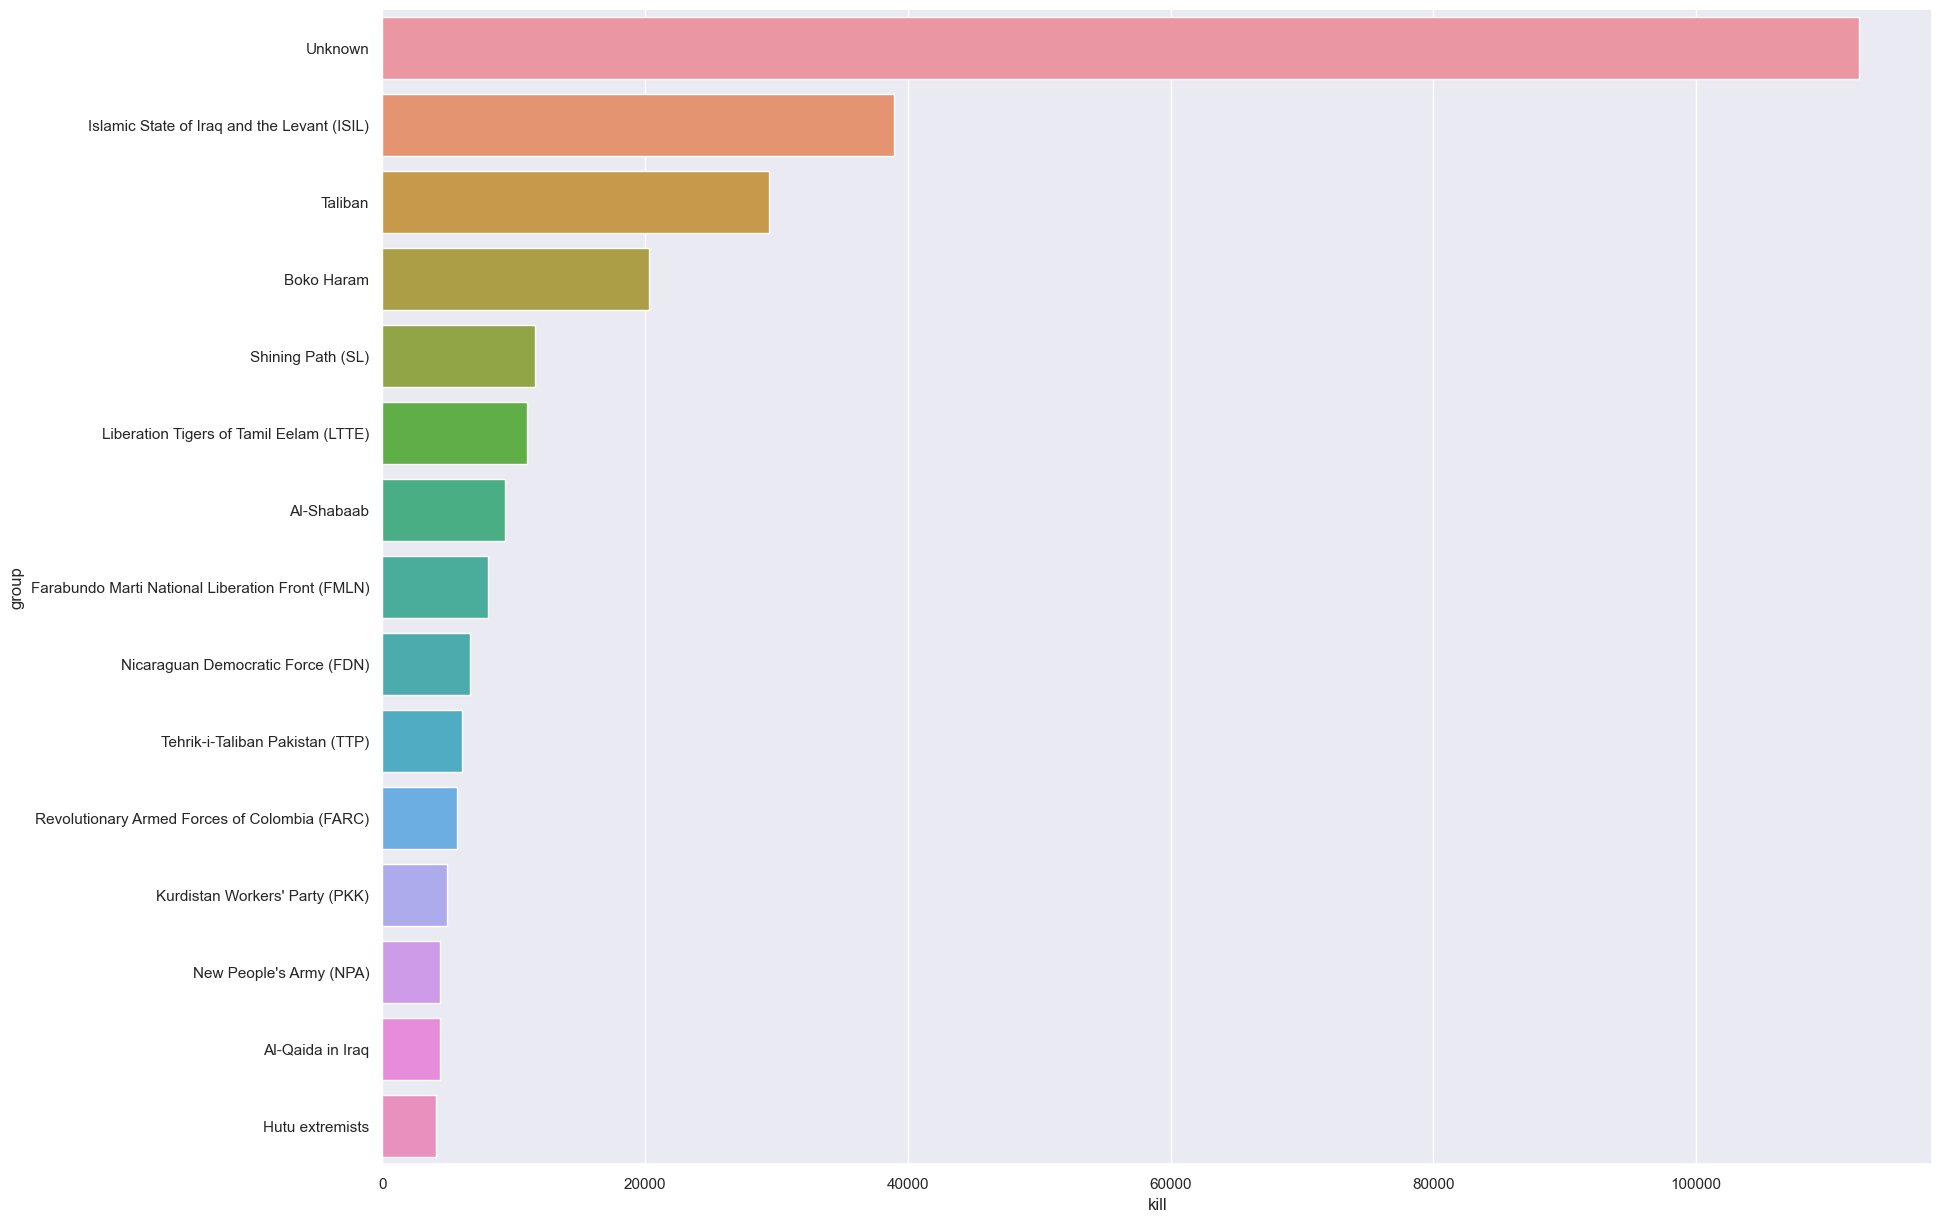

In [22]:
top15_group.reset_index(inplace=True)
plt.figure(figsize=(20, 15))
plot = sns.barplot(y='group', x='kill', data=top15_group)